## Imports

In [ ]:
!pip install pmdarima

In [1]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
import numpy as np
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
import warnings
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import glob
import os

## Preprocessing Data

In [ ]:
#df_big = pd.read_csv('../data_raw/sms-call-internet-mi-2013-11-01.txt',sep='\t',header=None, usecols=[0, 1, 7], names=["SquareId", "TimeInterval", "InternetActivity"])

#joined_files = os.path.join("../data_raw", "sms-call-internet-mi-2013-11-*.txt")
#joined_list = glob.glob(joined_files)

#dfs = []
#for f in joined_list:
#    dfs.append(pd.read_csv(f, sep='\t',header=None, usecols=[0, 1, 7], names=["SquareId", "TimeInterval", "InternetActivity"]))
#    dfs[-1] = dfs[-1].dropna()
#df_big = pd.concat(dfs, ignore_index=True)

#names=['SquareId', 'TimeInterval', 'SmsIn', 'SmsOut', 'CallIn', 'callOut', 'InternetActivity', 'CountryCode']
#df_big.columns = names
#df_big = df_big.dropna()
#print(len(df_big))
#df_big.head(20)

In [ ]:
#df = df_big[df_big['SquareId'] == 1]
#df = df.sort_values(by='TimeInterval')
#df = df.drop('SquareId', axis=1)
#df = df.groupby('TimeInterval').sum()
#df.set_index('TimeInterval', inplace=True)
#print(df.shape)
#df.head(20)
#df.index = pd.to_datetime(df.index, unit='ms')

## Read Pickle Data (Skip Preprocessing)

In [10]:
df = pd.read_pickle("../data_pickles/grid70_80_all.pkl")
print(df.shape)
df.head(20)

(8928, 1)


,InternetActivity
TimeInterval,
2013-10-31 23:00:00,215.151102
2013-10-31 23:10:00,227.057513
2013-10-31 23:20:00,265.146854
2013-10-31 23:30:00,194.894117
2013-10-31 23:40:00,223.596072
2013-10-31 23:50:00,152.022171
2013-11-01 00:00:00,164.523412
2013-11-01 00:10:00,188.971398
2013-11-01 00:20:00,135.172256


In [11]:
# Trim Dataset by fraction
frac = 0.5
df = df.iloc[:int(df.size*frac)]

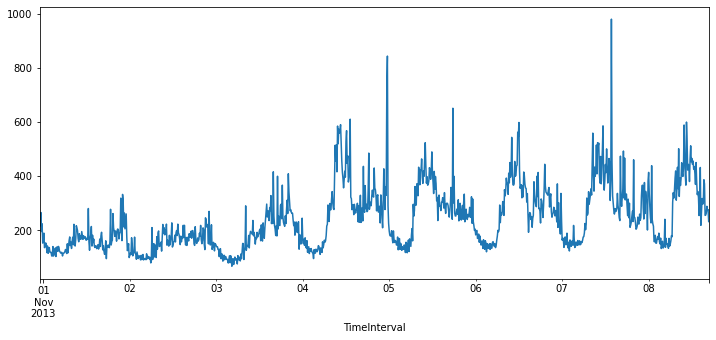

In [12]:
df['InternetActivity'].plot(figsize=(12,5));

## ARIMA Stationarity Test

In [13]:
def adf_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF: ", dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num of Observations Used for ADF Regression: ", dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
        print("\t",key, ": ", val)
    
adf_test(df['InternetActivity'])

1. ADF:  -4.340526660891503
2. P-Value :  0.00037765559412823767
3. Num Of Lags :  18
4. Num of Observations Used for ADF Regression:  1097
5. Critical Values :
	 1% :  -3.436325084538422
	 5% :  -2.8641782797532214
	 10% :  -2.5681747043025274


In [14]:
stepwise_fit = auto_arima(df['InternetActivity'], trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=12197.981, Time=0.53 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12483.982, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12321.804, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12202.813, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12481.982, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=12197.109, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=12196.257, Time=0.17 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=12196.832, Time=0.33 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=12197.343, Time=0.25 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=12198.125, Time=0.41 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=12194.261, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=12200.815, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=12195.110, Time=0.10 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=12194.835, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0

## Training

In [ ]:
#print(df.shape)
#train = df.iloc[:-30]
#test = df.iloc[-30:]
#print(train.shape, test.shape)
#print(test.iloc[0], test.iloc[-1])

In [ ]:
#model = ARIMA(train['InternetActivity'], order=(4,1,1))
#model_fit = model.fit()
#model_fit.summary()

## Making predictions

In [ ]:
#start = len(train)
#end = len(train) + len(test) -1
#pred = model_fit.predict(start = start, end = end, typ = 'levels').rename('ARIMA Predictions')
#pred.plot(legend=True)
#test['InternetActivity'].plot(legend=True)

In [ ]:
autocorrelation_plot(df)

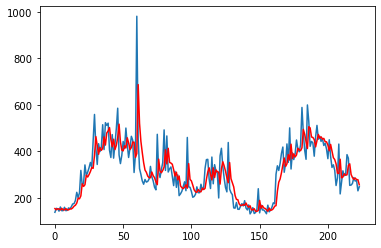

In [15]:
X = df.values
size = int(len(X)*0.8)

train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    # Use the AutoArima function above to determine order
    model = ARIMA(history, order=(0,1,2))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    observations = test[t]
    history.append(observations)
    
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [16]:
rmse = sqrt( mean_squared_error(predictions, test))
print(rmse)

77.86623193856339


## Save data to folder for results comparison

In [17]:
# Convert to numpy array
arr = np.array(predictions)

# Change name to describe experiment: ARIMA_<data_length[100,50,12]>_<grid_x>_<grid_y>_<order>
# ----------------------------------------
filename = "ARIMA_12_50_50_012.npy"
# ----------------------------------------

folder_name = "../results/ARIMA"
f = os.path.join(folder_name, filename)
np.save(f, arr)

## Loading a npy file (for reference)

In [ ]:
data = np.load(f)

In [ ]:
# To validate
pyplot.plot(test)
pyplot.plot(data, color='red')
pyplot.show()

In [ ]:
rmse = sqrt( mean_squared_error(data, test))
print(rmse)

Looks good!